In [1]:
# Importing nessessary libs
import numpy as np
import matplotlib.pyplot as plt

## __0. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.__

In [2]:
a = np.random.random((10, 3))
print(a)
print("\nAns:")
for i in range(10):
    distmin = abs(a[i, 0] - 0.5)
    dist = 0
    distminindex = 0

    for j in range(1, 3):
        dist = abs(a[i, j] - 0.5)
        if(dist < distmin):
            distminindex = j
            distmin = dist
    
    print(a[i, distminindex])


[[0.45151588 0.21578717 0.18645565]
 [0.34291651 0.04070551 0.31919249]
 [0.31907161 0.03381171 0.24952605]
 [0.59978293 0.67533643 0.26563966]
 [0.65548523 0.12051656 0.17103131]
 [0.6134736  0.83830322 0.35310139]
 [0.03216958 0.06534082 0.03629565]
 [0.46557967 0.00548504 0.78584622]
 [0.26375457 0.36743781 0.25858914]
 [0.51761539 0.95628581 0.4804064 ]]

Ans:
0.4515158764395176
0.34291650789559514
0.3190716133843171
0.5997829340388464
0.655485231999336
0.6134735950271953
0.0653408191169983
0.46557967034245384
0.3674378098751593
0.5176153862300353


## __1. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.__

In [3]:
a = 10*np.random.random((6, 6))
print(a)
print("\nAns:")
for i in range(6):
    sum = 0
    min = a[0, i]
    for j in range(6):
        sum+= a[i, j]
        if (abs(a[j, i]) < abs(min)):
            min = a[j, i]

    if(min == 0):
        print("\infty")
    else:
        print(sum/min)



[[5.59818891 4.55049605 6.55249697 7.87629955 1.09456912 2.17378755]
 [5.9462247  0.90424835 2.17399037 5.0142477  1.63812735 9.80744317]
 [3.30988148 7.13484013 0.93580343 0.54612997 3.01290258 7.55598048]
 [4.84413444 7.19836908 4.7771672  0.98839918 6.38800075 2.40177803]
 [2.75889761 6.58218506 4.25294657 2.16972894 5.92697653 4.23052652]
 [8.48602583 8.5132983  8.62610604 8.11017162 1.37369423 6.12962908]]

Ans:
10.0931031375397
28.182834488353564
24.038742970603135
48.70241525517846
23.68170331015702
18.971000682099124


## __2. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.__

In [4]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(x)

first = True
for i in range(1, x.size):
    if (x[i-1] == 0):
        if(first):
            max = x[i]
            first = False
        else:
            if(max < x[i]):
                max = x[i]
                
print("\nAns:")
if(first):
    print("Not Found")
else:
    print(max)


[6 2 0 3 0 0 5 7 0]

Ans:
5


## __3. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.__

In [5]:
y = np.ones(10)
I = np.array([0, 1, 2, 3, 5, 5, 5, 8])

for i in I:
    if(i < y.size):
        y[i]+=1

print(y)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


## __5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).__

In [17]:
import math
threshhold = 1e-6

# create new clusters based on new centres
def reclusterise(data, clusters, centres):
    new_clusters = np.empty((len(clusters), 2))

    for i in range(len(clusters)):
        new_clusters[i] = np.mean(data[centres == i], axis=0)
    return new_clusters

#\forall x \in data \exists c - nearest centre 
def regroup(data, clusters):
    centres = np.empty(len(data[:, 0]))

    for i in range(len(data[:, 0])):
        centres[i] = np.argmin(np.sum( (data[i] - clusters)**2, axis=1) ).astype(int)

    return centres
                    
def kms(data, k = 2):
    # Choosing pivot centres
    indices = np.random.choice(len(data[:, 0]), k, replace = False)
    new_clusters = data[indices]
    centres = regroup(data, new_clusters)
    clusters = np.zeros((len(new_clusters), 2))

    # Staring the algorithm
    while (np.allclose(clusters, new_clusters, threshhold) == 0):
        clusters = new_clusters
        centres = regroup(data, clusters)
        new_clusters = reclusterise(data, clusters, centres)
        
    # Calculating distortion
    distortion = 0.0
    for i in range(len(data)):
        distortion+=np.sum((data[i]-clusters[centres[i].astype(int)])**2)**0.5

    distortion/=len(data[:, 0])

    return clusters, distortion


## __6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.__

# Part 1. Data Analysis

### __Step 1. Load data and make scatterplots of considered pairs.__

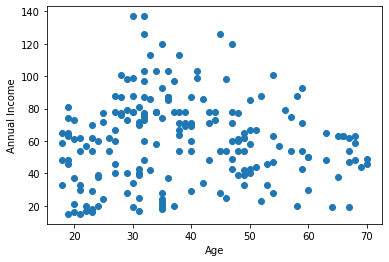

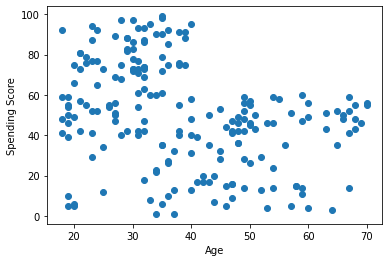

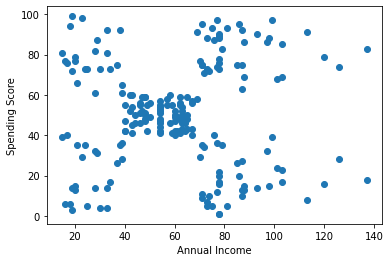

In [7]:
data = np.loadtxt("https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv", delimiter=',', dtype=object, skiprows=1)
data[:, 1] = '0'
data = data.astype('float')

plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()
# wild guess: k1=2

plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()
# wild guess: k2=2

plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
# wild guess: k3=5

### __Step 2. Find optimal number of clusters using elbow method.__

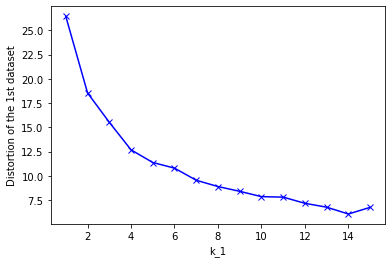

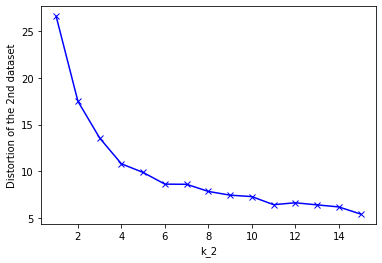

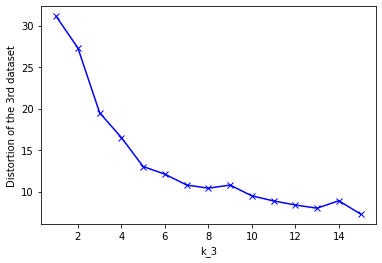

In [14]:
real_data1 = np.column_stack((data[:, 2],data[:, 3]))
real_data2 = np.column_stack((data[:, 2],data[:, 4]))
real_data3 = np.column_stack((data[:, 3],data[:, 4]))

k_max = 15

distortion1 = np.zeros(k_max)
distortion2 = np.zeros(k_max)
distortion3 = np.zeros(k_max)

for k in range(k_max):
    distortion1[k] = kms(real_data1, k+1)[1]
    distortion2[k] = kms(real_data2, k+1)[1]
    distortion3[k] = kms(real_data3, k+1)[1]

plt.plot(range(1, k_max+1), distortion1, 'bx-')
plt.xlabel('k_1')
plt.ylabel('Distortion of the 1st dataset')
plt.show()

plt.plot(range(1, k_max+1), distortion2, 'bx-')
plt.xlabel('k_2')
plt.ylabel('Distortion of the 2nd dataset')
plt.show()

plt.plot(range(1, k_max+1), distortion3, 'bx-')
plt.xlabel('k_3')
plt.ylabel('Distortion of the 3rd dataset')
plt.show()

Choosing:
1) From first dataset k = 2 or 4
2) From second dataset k = 3 or 5
3) From third dataset k = 3 or 5

Looking at data scatterplots it's quite obvious which 'k'-s might be optimal.



 First dataset: Age - Annual Income

Number of clusters:    2


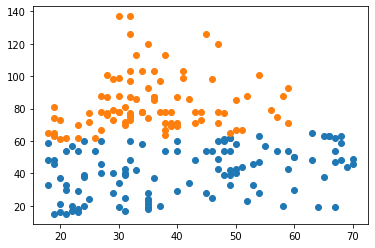

Number of clusters:    4


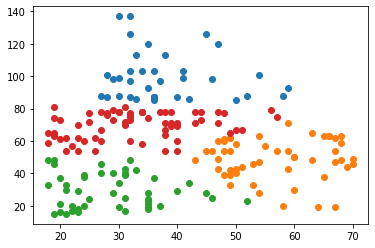



 Second dataset: Age - Spending Score

Number of clusters:    3


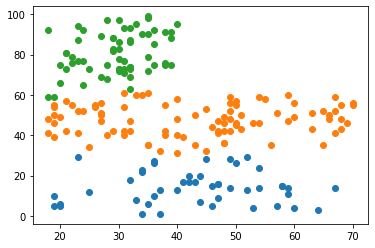


Number of clusters:    5


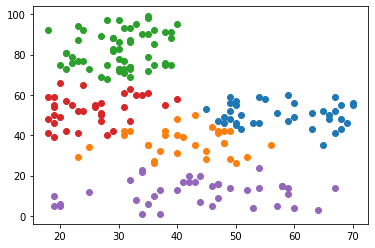



 Third dataset: Annual Income - Spending Score

Number of clusters:    3


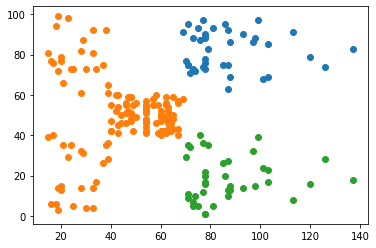


Number of clusters:    5


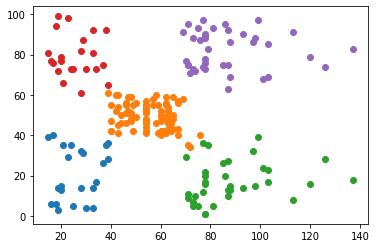

In [16]:
k_a = [2, 3, 5, 4]

print("\n\n First dataset: Age - Annual Income\n")

print("Number of clusters:   ", k_a[0])
clusters1 = regroup(real_data1, kms(real_data1, k_a[0])[0])
for j in range(k_a[0]):
    plt.scatter(real_data1[clusters1==j, 0], real_data1[clusters1==j, 1])
plt.show()

print("Number of clusters:   ", k_a[3])
clusters1 = regroup(real_data1, kms(real_data1, k_a[3])[0])
for j in range(k_a[3]):
    plt.scatter(real_data1[clusters1==j, 0], real_data1[clusters1==j, 1])
plt.show()


print("\n\n Second dataset: Age - Spending Score\n")

print("Number of clusters:   ", k_a[1])
clusters2 = regroup(real_data2, kms(real_data2, k_a[1])[0])
for j in range(k_a[1]):
    plt.scatter(real_data2[clusters2==j, 0], real_data2[clusters2==j, 1])
plt.show()

print("\nNumber of clusters:   ", k_a[2])
clusters2 = regroup(real_data2, kms(real_data2, k_a[2])[0])
for j in range(k_a[2]):
    plt.scatter(real_data2[clusters2==j, 0], real_data2[clusters2==j, 1])
plt.show()


print("\n\n Third dataset: Annual Income - Spending Score\n")

print("Number of clusters:   ", k_a[1])
clusters3 = regroup(real_data3, kms(real_data3, k_a[1])[0])
for j in range(k_a[1]):
    plt.scatter(real_data3[clusters3==j, 0], real_data3[clusters3==j, 1])
plt.show()

print("\nNumber of clusters:   ", k_a[2])
clusters3 = regroup(real_data3, kms(real_data3, k_a[2])[0])
for j in range(k_a[2]):
    plt.scatter(real_data3[clusters3==j, 0], real_data3[clusters3==j, 1])
plt.show()

# Part 2. Visual Analysis.

### __"Age - Annual Income" Diagram__
Dividing them into 2 groups:
1) All their lives they earn less than $60,000;    
2) All their lives they earn more than $60,000;

### __"Age - Spending Score" Diagram__
Dividing them into 3 groups:
1) Spending Score more than 60;
2) Spending Score more than 30;
3) Spending Score more than 0 ;

Dividing them into 5 groups we get a more representative partition:
1) Age less than 42, Spending Score more than 80;
2) Age less than 42, Spending Score more than 60;
3) Age less than 42, Spending Score more than 30;
4) Age more than 42, Spending Score more than 30;
5) Spending Score less than 30;

### __"Annual Income - Spending Score" Diagram__

Dividing them in 3 groups gives us basically the same information as in 5 groups:
1) Annual Income less than $40,000, Age less than 40;
2) Annual Income less than $40,000, Age more than 60;
3) Annual Income more than $40,000, but less than $70,000 (aged from 40 to 60);
4) Annual Income more than $70,000, Age less than 40;
5) Annual Income more than $70,000, Age more than 60;